### Installing WordCloud

In [1]:
! pip install wordcloud

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


### Importing All Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

### Importing The Speech

In [3]:
speech= pd.read_csv('speech.txt',delimiter='\n')
speech.head(5)

,speech
0,"ADDRESS BY HIS EXCELLENCY, MUHAMMADU BUHARI, P..."
1,"Fellow Nigerians, Today, June The 12th, marks ..."
2,"2. From 1999, we consistently celebrated Democ..."
3,"3. In 2018, we moved Democracy Day from 29th o..."
4,"4. On June 12th 1993, Nigerians saw the best i..."


### Cleaning The Speech

##### Removing The Numbering

In [4]:
def remove_numbering(text):
    text= re.sub(r'\d\d\.|\d\.', '',text)
    return text
speech['speech']= speech['speech'].apply(remove_numbering)
speech.head(5)

,speech
0,"ADDRESS BY HIS EXCELLENCY, MUHAMMADU BUHARI, P..."
1,"Fellow Nigerians, Today, June The 12th, marks ..."
2,"From 1999, we consistently celebrated Democra..."
3,"In 2018, we moved Democracy Day from 29th of ..."
4,"On June 12th 1993, Nigerians saw the best in ..."


##### Removing Puntuations

In [5]:
def remove_punct(text):
    text= re.sub(r'[^0-9A-Za-z\s]', '',text)
    return text
speech['speech']= speech['speech'].apply(remove_punct)
speech.head(5)

,speech
0,ADDRESS BY HIS EXCELLENCY MUHAMMADU BUHARI PRE...
1,Fellow Nigerians Today June The 12th marks ano...
2,From 1999 we consistently celebrated Democrac...
3,In 2018 we moved Democracy Day from 29th of M...
4,On June 12th 1993 Nigerians saw the best in o...


### Preparing The Speech For Word Cloud

##### Turning The Speech To A List

In [6]:
speech_list=speech['speech'].to_list()
speech_list

['ADDRESS BY HIS EXCELLENCY MUHAMMADU BUHARI PRESIDENT AND COMMANDER IN CHIEF OF THE ARMED FORCES OF THE FEDERAL REPUBLIC OF NIGERIA ON THE OCCASION OF COMMEMORATION AND CELEBRATION OF DEMOCRACY DAY 12TH JUNE 2022',
 'Fellow Nigerians Today June The 12th marks another Democracy Day anniversary and an occasion to celebrate freedom and unity of our Nation',
 ' From 1999 we consistently celebrated Democracy Day to mark the end of military rule and the return of power and control into the hands of those freely elected by the people On this day Nigerians recommit themselves to ensuring we protect and preserve the ideals of democracy',
 ' In 2018 we moved Democracy Day from 29th of May to the 12th of June This change was to remind all Nigerians of one free election after which the presumed winner along with Nigerians were denied their rights and their choice',
 ' On June 12th 1993 Nigerians saw the best in our citizens as we all went out to vote peacefully By June 24th 1993 we also saw the w

#### Turning The List To A Text

In [7]:
speech_text= ' '.join(speech_list)
speech_text

'ADDRESS BY HIS EXCELLENCY MUHAMMADU BUHARI PRESIDENT AND COMMANDER IN CHIEF OF THE ARMED FORCES OF THE FEDERAL REPUBLIC OF NIGERIA ON THE OCCASION OF COMMEMORATION AND CELEBRATION OF DEMOCRACY DAY 12TH JUNE 2022 Fellow Nigerians Today June The 12th marks another Democracy Day anniversary and an occasion to celebrate freedom and unity of our Nation  From 1999 we consistently celebrated Democracy Day to mark the end of military rule and the return of power and control into the hands of those freely elected by the people On this day Nigerians recommit themselves to ensuring we protect and preserve the ideals of democracy  In 2018 we moved Democracy Day from 29th of May to the 12th of June This change was to remind all Nigerians of one free election after which the presumed winner along with Nigerians were denied their rights and their choice  On June 12th 1993 Nigerians saw the best in our citizens as we all went out to vote peacefully By June 24th 1993 we also saw the worst of our leade

### Importing Stopwords

In [8]:
stopwords= open('stop.txt', 'r', encoding='utf-8')
lst_stopwords=[word.strip('\n') for word in stopwords.readlines()]
stopwords.close()
lst_stopwords

['up',
 'won',
 'their',
 'am',
 'there',
 'just',
 'out',
 'can',
 'through',
 'been',
 'i',
 'now',
 'to',
 'or',
 'over',
 'these',
 'again',
 're',
 'ain',
 'were',
 'this',
 't',
 'here',
 'all',
 'other',
 'do',
 'm',
 'ma',
 'they',
 'will',
 'his',
 'you',
 'during',
 'is',
 'into',
 've',
 'those',
 'when',
 's',
 'your',
 'an',
 'some',
 'has',
 'and',
 'very',
 'after',
 'no',
 'me',
 'should',
 'themselves',
 'which',
 'if',
 'with',
 'further',
 'my',
 'must',
 'at',
 'any',
 'her',
 'the',
 'have',
 'against',
 'from',
 'that',
 'y',
 'a',
 'how',
 'it',
 'we',
 'being',
 'who',
 'already',
 'in',
 'o',
 'not',
 'then',
 'about',
 'd',
 'was',
 'on',
 'as',
 'll',
 'most',
 'doing',
 'so',
 'for',
 'don',
 'are',
 'our',
 'us',
 'only',
 'by',
 'be',
 'he',
 'them',
 'until',
 'of',
 'however']

### Generating The Word Cloud

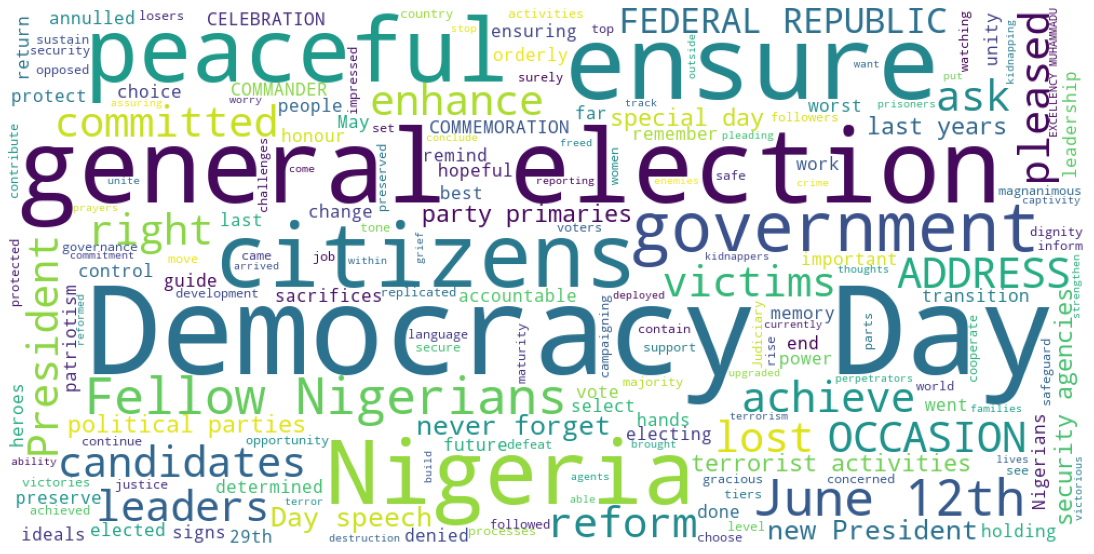

In [9]:
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords=lst_stopwords,
                min_font_size = 10, max_words=len(speech_text), random_state=30, collocation_threshold=1).generate(speech_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Saving The Word Clod Figure

In [10]:
wordcloud.to_file('wordcloud.png')